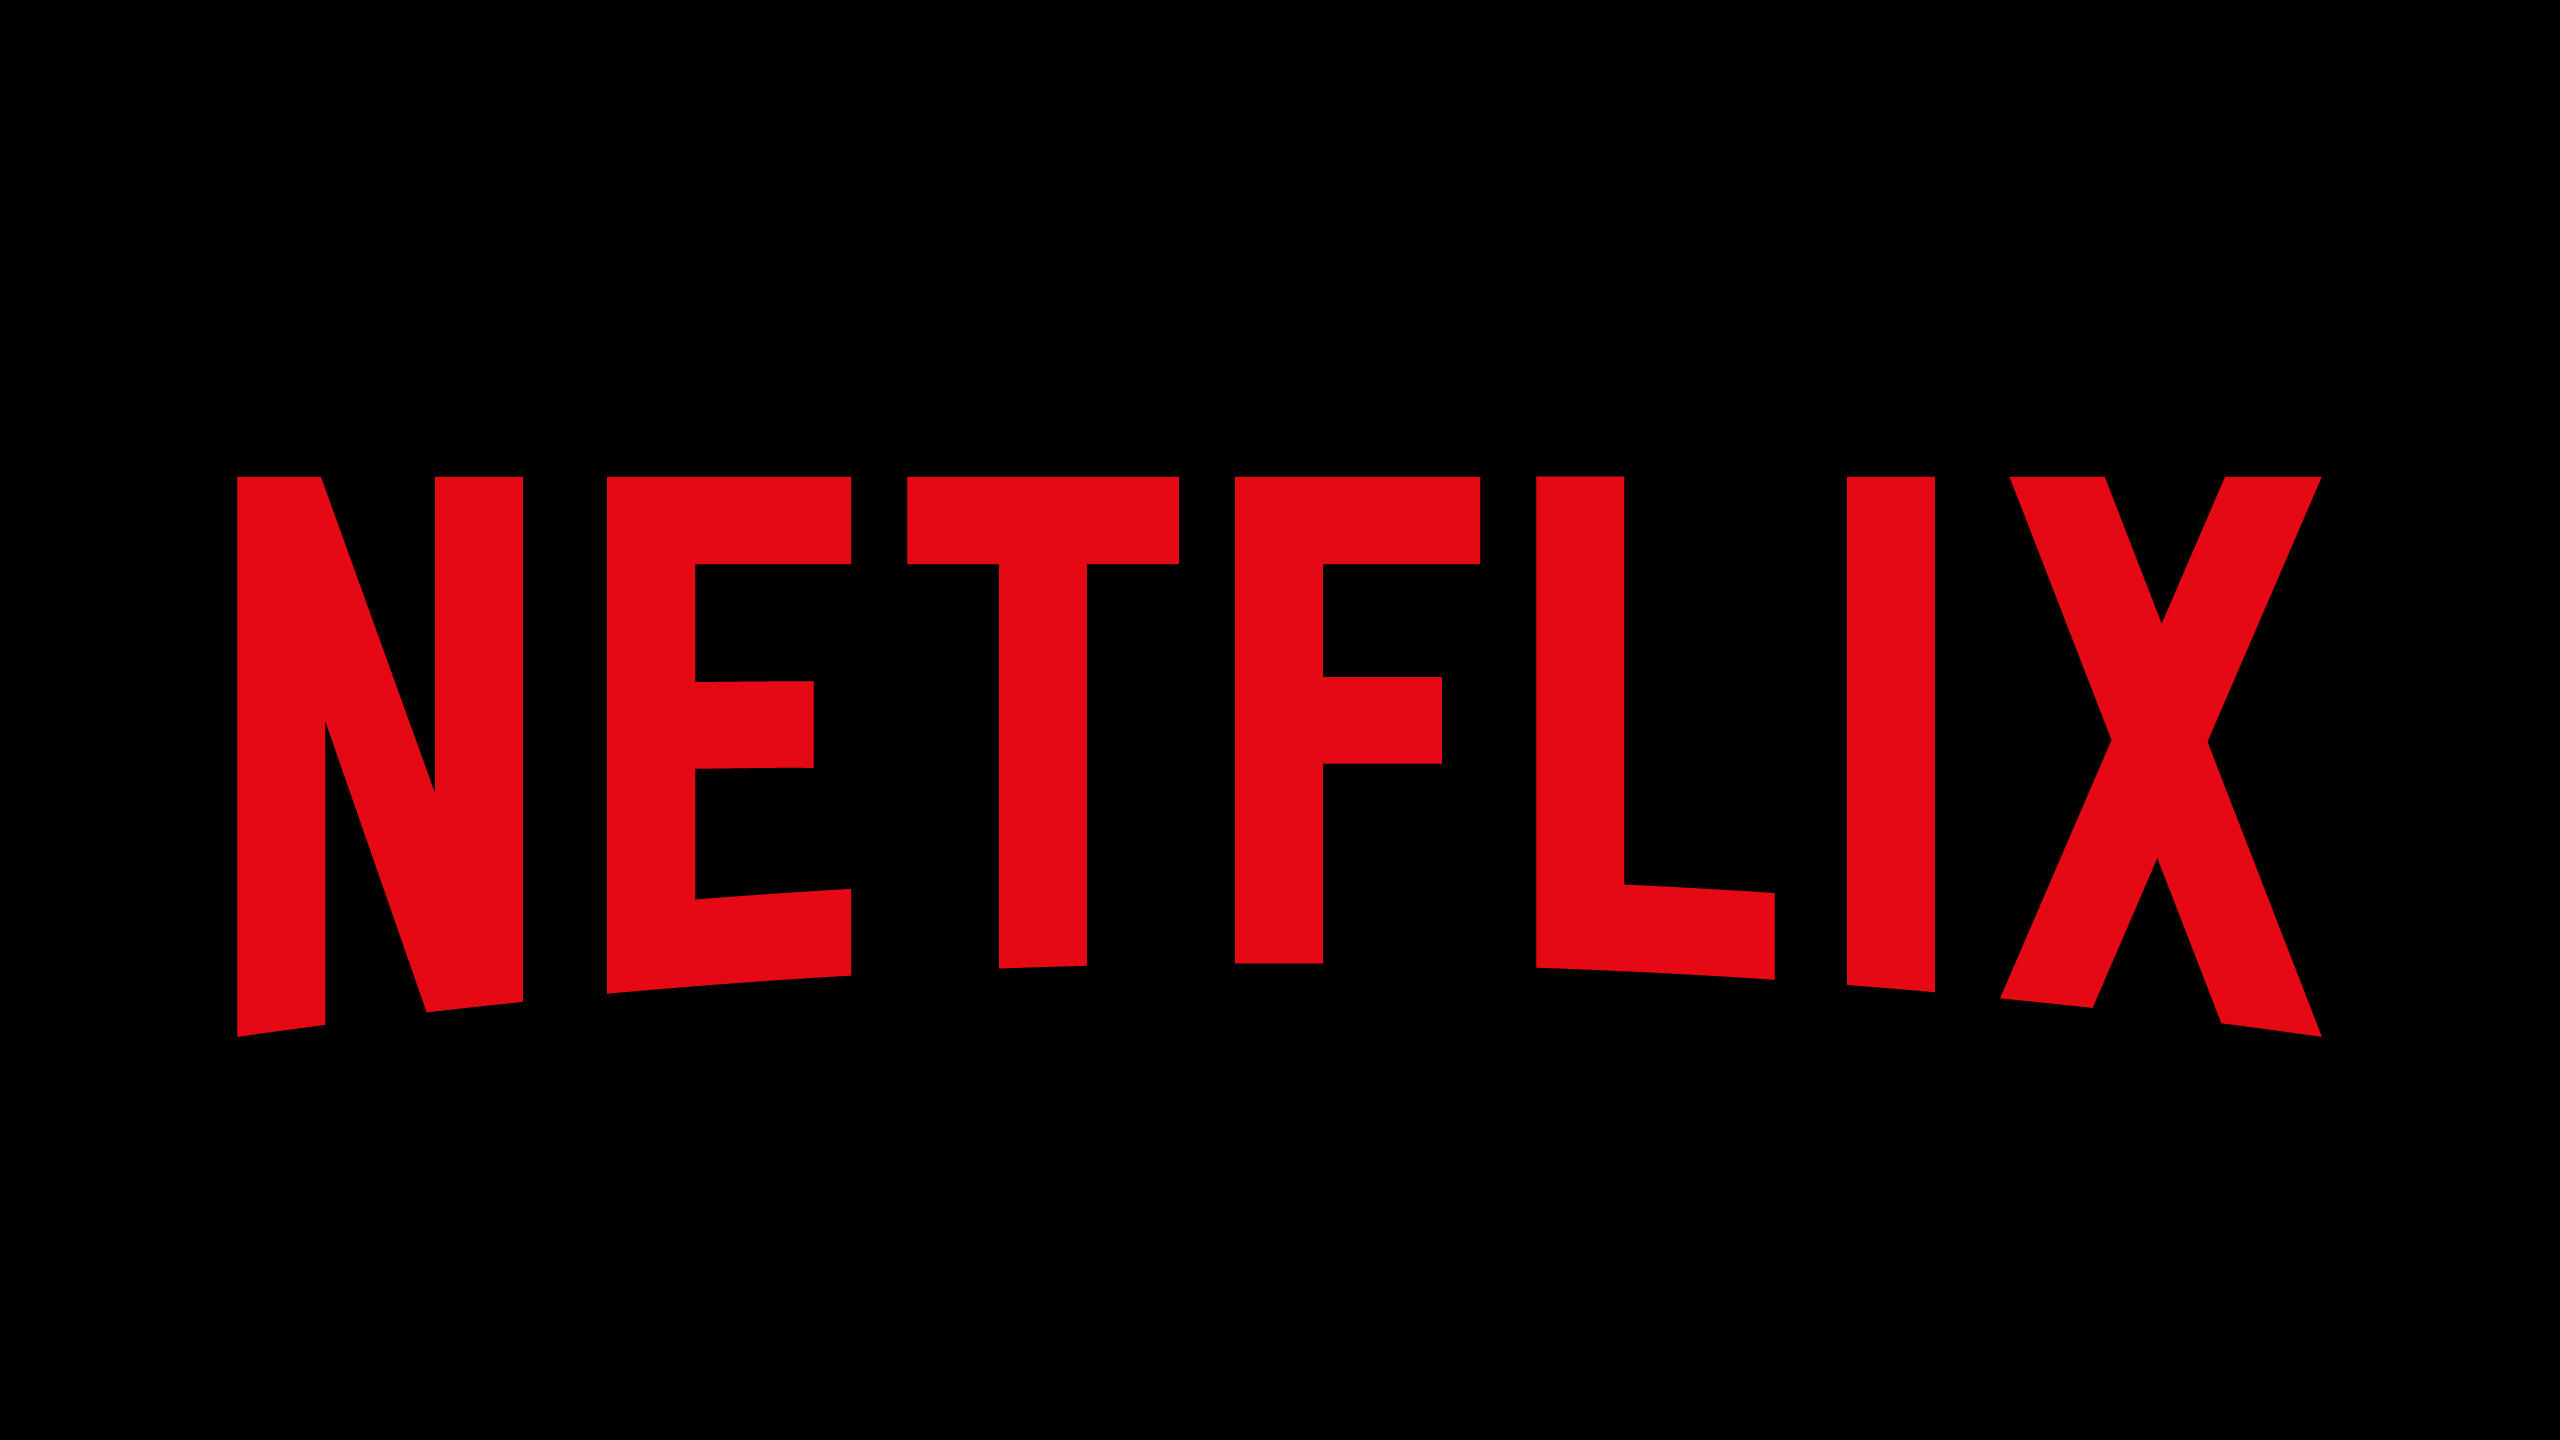

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("netflix.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df['cast'].nunique()

6831

In [5]:
m = df[df['type'] == 'Movie']['type'].count()/len(df)*100
t = df[df['type'] == 'TV Show']['type'].count()/len(df)*100
print("Movie: {}%".format( round(m,2)))
print("TV Show: {}%".format( round(t,2)))

Movie: 69.05%
TV Show: 30.95%


In [6]:
x = df.groupby(['type'])['type'].count()
y = len(df)
r = ((x/y)).round(2)
in_ratio = pd.DataFrame(r)
in_ratio

,type
type,
Movie,0.69
TV Show,0.31


In [7]:
for i in df.columns:
    null_rate = df[i].isna().sum()/len(df)*100
    if null_rate > 0:
        print("{} null rate: {}%".format(i, round(null_rate,2)))

director null rate: 30.68%
cast null rate: 9.22%
country null rate: 6.51%
date_added null rate: 0.13%
rating null rate: 0.09%


In [8]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data', inplace=True)
df['director'].replace(np.nan, 'No Data', inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
df['count'] = 1

In [11]:
df['date'] = pd.to_datetime(df['date_added'])
df['Nmonth'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [12]:
df.rename(columns = {'listed_in' : 'genre'}, inplace=True)

In [13]:
df.genre = df.genre.str.split(',').str[0]

In [14]:
df['fcountry'] = df['country'].apply(lambda x: x.split(",")[0])

df['fcountry'].replace('United States', 'USA', inplace=True)
df['fcountry'].replace('United Kingdom', 'UK', inplace=True)
df['fcountry'].replace('South Korea', 'S.Korea', inplace=True)

In [15]:
print(df.dtypes)

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added              object
release_year             int64
rating                  object
duration                object
genre                   object
description             object
count                    int64
date            datetime64[ns]
Nmonth                   int64
year                     int64
fcountry                object
dtype: object


In [16]:
df['months'] = df['date_added'].apply(lambda x: x.split(",")[0])
df['months'] = df['months'].str[:-2]
df['months'] = df['months'].str.replace(' ','')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   object        
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  genre         7770 non-null   object        
 11  description   7770 non-null   object        
 12  count         7770 non-null   int64         
 13  date          7770 non-null   datetime64[ns]
 14  Nmonth        7770 non-null   int64         
 15  year          7770 non-null   int64   

In [19]:
df.groupby('release_year')[['type']].value_counts()

release_year  type   
1925          TV Show      1
1942          Movie        2
1943          Movie        3
1944          Movie        3
1945          Movie        3
                        ... 
2019          TV Show    414
2020          TV Show    457
              Movie      411
2021          TV Show     19
              Movie       12
Length: 118, dtype: int64

In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,genre,description,count,date,Nmonth,year,fcountry,months,show_seasons,movie_duration
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,International TV Shows,In a future where the elite inhabit an island ...,1,2020-08-14,8,2020,Brazil,August,4,N/A
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,Dramas,After a devastating earthquake hits Mexico Cit...,1,2016-12-23,12,2016,Mexico,December,N/A,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,Horror Movies,"When an army recruit is found dead, his fellow...",1,2018-12-20,12,2018,Singapore,December,N/A,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",1,2017-11-16,11,2017,USA,November,N/A,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,Dramas,A brilliant group of students become card-coun...,1,2020-01-01,1,2020,USA,January,N/A,123


In [19]:
v = df['type'].value_counts()
l = ['MOVIES', 'TV SHOWS']
e = [0,0.1]
c = ['black','red']

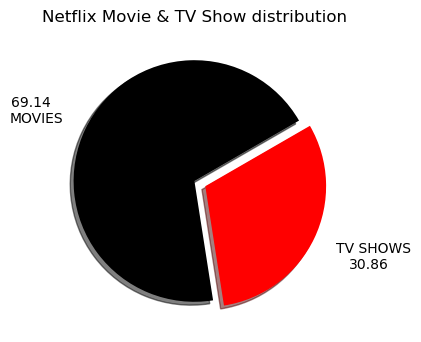

In [20]:
plt.figure(dpi=100)
plt.pie(v, labels=l, autopct="%.2f", explode=e, shadow=True, pctdistance=1.5, labeldistance=1.2, startangle=30, counterclock=True, colors=c)
plt.title('Netflix Movie & TV Show distribution')
plt.show()

In [21]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [43]:
ratings_ages = {'TV-MA': 'Adults', 'R': 'Adults', 'PG-13': 'Teens', 'TV-14': 'Teens', 'TV-PG': 'Older Kids', 'NR': 'Adults', 'TV-G': 'Kids', 'TV-Y': 'Kids',
       'TV-Y7': 'Older Kids', 'PG': 'Older Kids', 'G': 'Kids', 'NC-17': 'Adults', 'TV-Y7-FV': 'Older Kids', 'UR': 'Adults'}
df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [23]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,genre,description,count,date,Nmonth,year,fcountry,months,show_seasons,movie_duration,target_ages
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,International TV Shows,In a future where the elite inhabit an island ...,1,2020-08-14,8,2020,Brazil,August,4,N/A,Adults
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,Dramas,After a devastating earthquake hits Mexico Cit...,1,2016-12-23,12,2016,Mexico,December,N/A,93,Adults


In [24]:
order = pd.DataFrame(df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

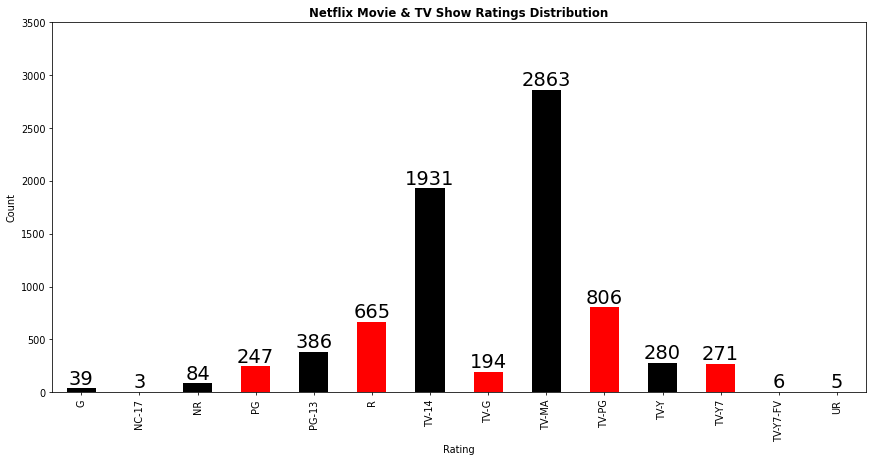

In [20]:
plt.figure(figsize=(15,7), dpi=70)
co = ['k','r']
ax = df.groupby(['rating'])['rating'].count().plot(kind='bar', color=co)
plt.title('Netflix Movie & TV Show Ratings Distribution', fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.yticks(np.arange(0,3501,500))

for container in ax.containers:
    ax.bar_label(container, fontsize=20)

plt.show()

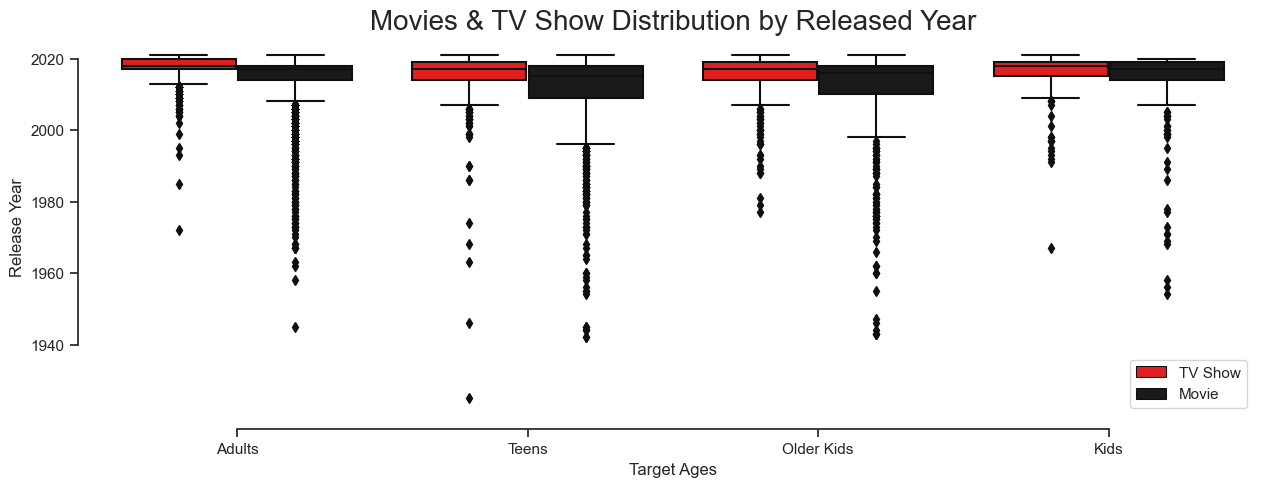

In [26]:
plt.figure(figsize=(15,5), dpi=100)
sns.set_theme(style='ticks', palette='pastel')
sns.boxplot(x='target_ages', y='release_year', hue='type', palette=['red','k'], data=df)
sns.despine(offset=10, trim=True)
plt.legend(loc="lower right")
plt.xlabel("Target Ages")
plt.ylabel("Release Year")
plt.title("Movies & TV Show Distribution by Released Year", fontsize=20)
plt.show()


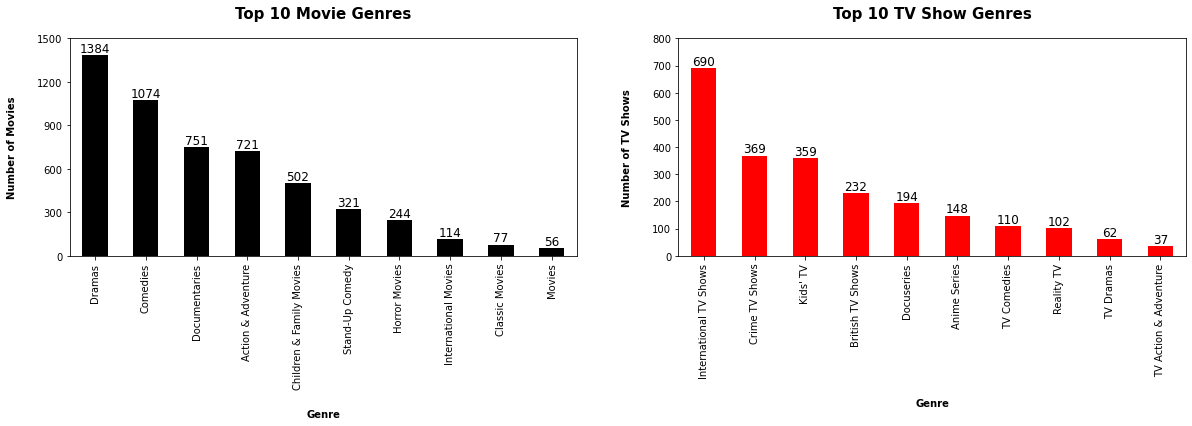

In [25]:
movie = df.loc[df.type == 'Movie']
tv_show = df.loc[df.type == 'TV Show']

plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
ax1 = movie.genre.value_counts()[:10].plot(kind='bar', color='black')
plt.xlabel('Genre', fontweight='bold', labelpad=20)
plt.ylabel('Number of Movies', fontweight='bold', labelpad=20)
plt.yticks(np.arange(0,1501,300))
plt.title('Top 10 Movie Genres', fontweight='bold', fontsize=15, pad=20)

plt.subplot(1, 2, 2)
ax2 = tv_show.genre.value_counts()[:10].plot(kind='bar', color='red')
plt.xlabel('Genre', fontweight='bold', labelpad=20)
plt.ylabel('Number of TV Shows', fontweight='bold', labelpad=20)
plt.yticks(np.arange(0,801,100))
plt.title('Top 10 TV Show Genres', fontweight='bold', fontsize=15, pad=20)

for container in ax1.containers:
    ax1.bar_label(container, fontsize=12)
for container in ax2.containers:
    ax2.bar_label(container, fontsize=12)
    
plt.show()    


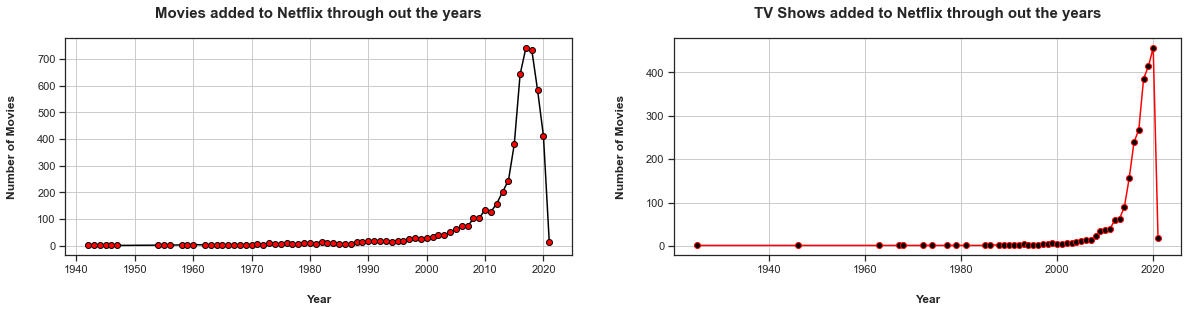

In [28]:
movie = df.sort_values(by = 'release_year').loc[(df.type == 'Movie')]
shows = df.sort_values(by = 'release_year').loc[(df.type == 'TV Show')]

plt.figure()

plt.subplot(1, 2, 1)
movie.release_year.value_counts(sort=False).plot(figsize=(20,4), marker='o', color='black', markerfacecolor='red')
plt.xlabel('Year', fontweight='bold', labelpad = 20)
plt.ylabel('Number of Movies', fontweight='bold', labelpad=20)
plt.title('Movies added to Netflix through out the years', fontweight='bold', fontsize=15, pad=20)
plt.grid()

plt.subplot(1, 2, 2)
shows.release_year.value_counts(sort=False).plot(figsize=(20,4), marker='o', color='red', markerfacecolor='black')
plt.xlabel('Year', fontweight='bold', labelpad = 20)
plt.ylabel('Number of Movies', fontweight='bold', labelpad=20)
plt.title('TV Shows added to Netflix through out the years', fontweight='bold', fontsize=15, pad=20)
plt.grid()

plt.show()


In [29]:
df.groupby('months')['type'].value_counts()

months     type   
April      Movie      419
           TV Show    181
August     Movie      413
           TV Show    204
December   Movie      554
           TV Show    278
February   Movie      328
           TV Show    143
January    Movie      559
           TV Show    197
July       Movie      403
           TV Show    197
June       Movie      377
           TV Show    165
March      Movie      470
           TV Show    198
May        Movie      371
           TV Show    172
November   Movie      511
           TV Show    227
October    Movie      553
           TV Show    232
September  Movie      414
           TV Show    204
Name: type, dtype: int64

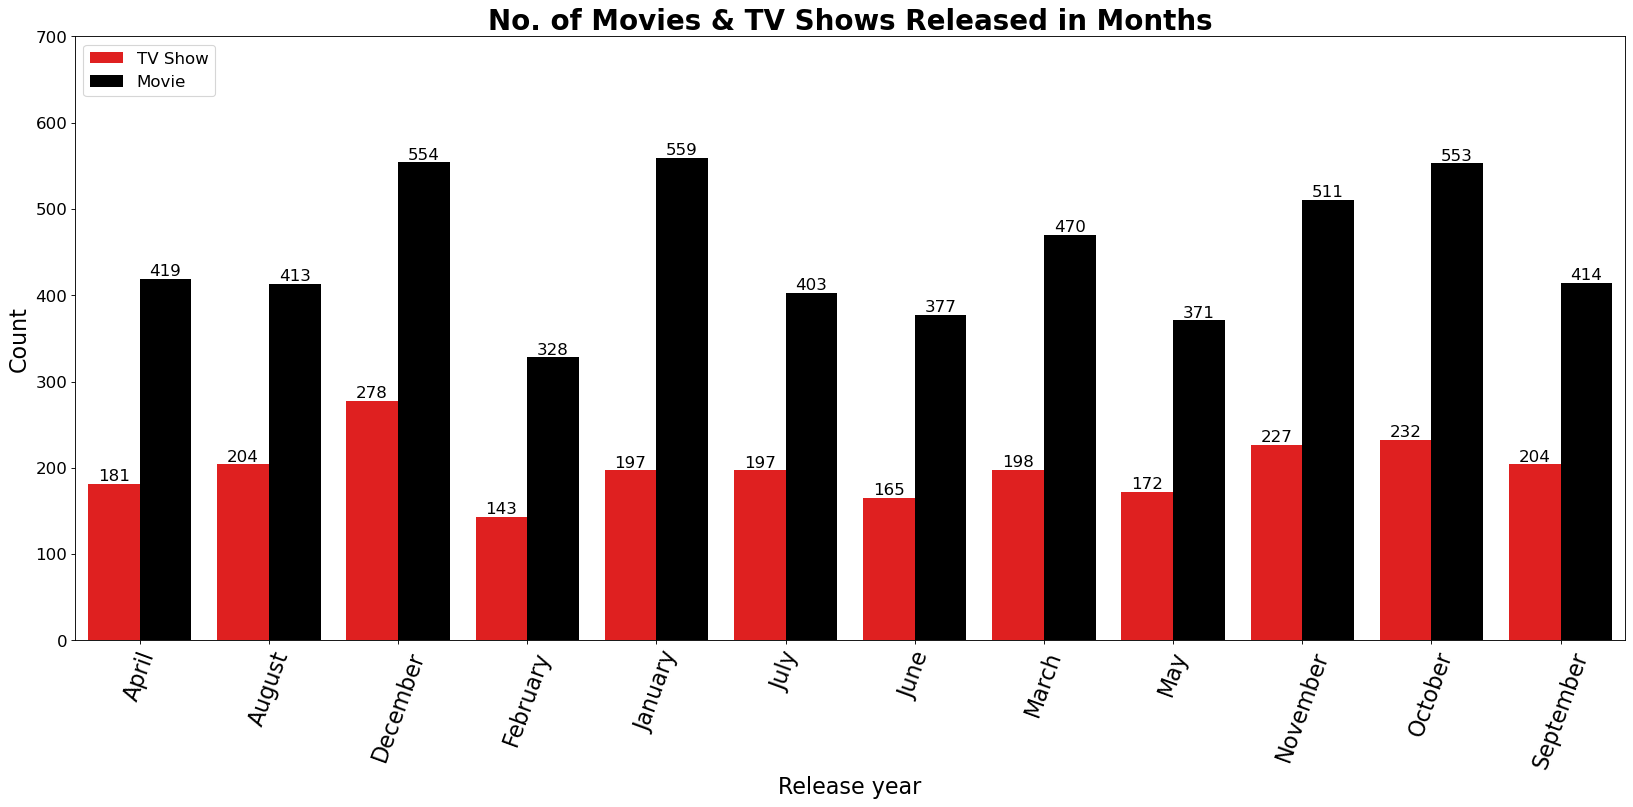

In [38]:
plt.figure(figsize=(25,10), dpi=80)
co = df.groupby('months')['type'].count().index
ax = sns.countplot(x='months', order=co, data=df, hue='type', palette=['red','black'])
plt.xticks(rotation=70,fontsize=20)
plt.title('No. of Movies & TV Shows Released in Months',fontsize=25, fontweight='bold')
plt.legend(loc="upper left",fontsize=15)
plt.xlabel('Release year',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.yticks(np.arange(0,701,100),fontsize=15)


for container in ax.containers:
    ax.bar_label(container, fontsize=15)

plt.show()

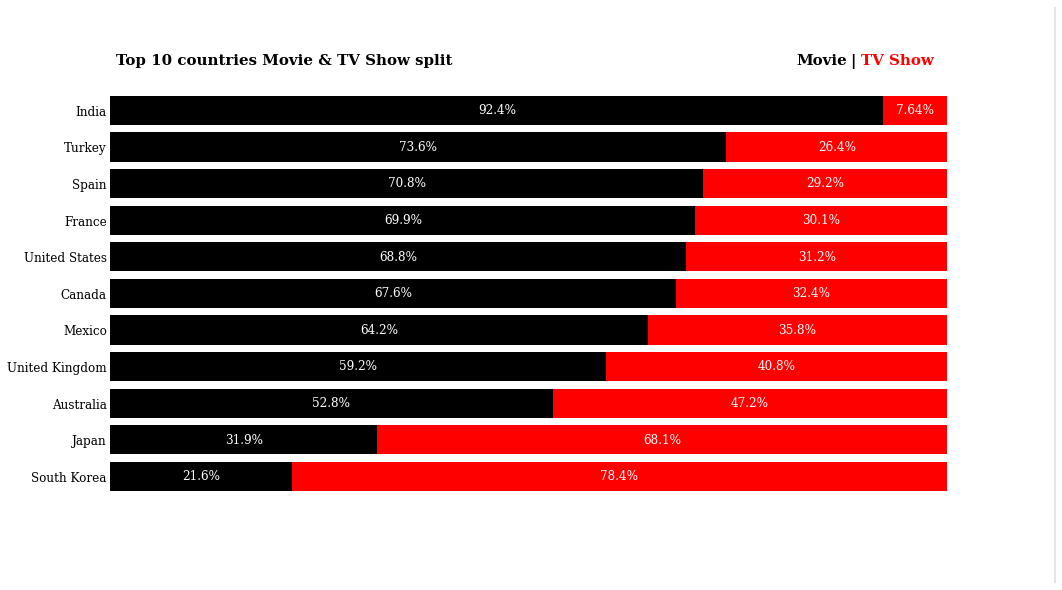

In [40]:
country_order = df['fcountry'].value_counts()[:11].index
data_q2q3 = df[['type', 'fcountry']].groupby('fcountry')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='black', label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='red', label='TV Show')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.90, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
fig.text(0.76,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='red')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

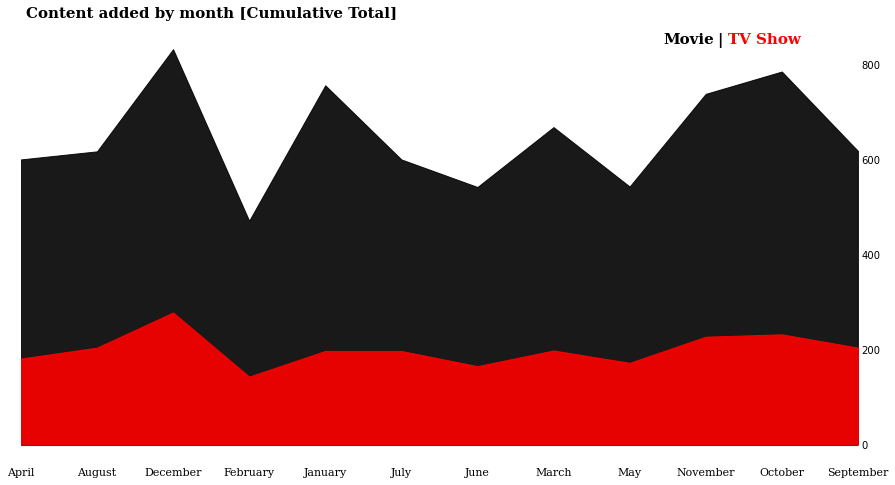

In [41]:
data_sub = df.groupby('type')['months'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
color = ["black", "red"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)

plt.xticks(fontsize=11) 
plt.yticks(fontsize=11)

    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

#ax.set_xlim(2008,2020)
#plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.90, 'Content added by month [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(0.72,0.855,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.77,0.855,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.78,0.855,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='red')


ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [ ]:
df['show_seasons'] = np.where(df.duration.str.contains('min') == True, 'N/A', df.duration.str.split(' ').str[0])
df['movie_duration'] = np.where(df.duration.str.contains('min') == False, 'N/A', df.duration.str.split(' ').str[0])

df.show_seasons = df.show_seasons.str.replace('Not', 'N/A')
df.movie_duration = df.movie_duration.str.replace('Not', 'N/A')
df = df.drop(['duration'], axis=1)

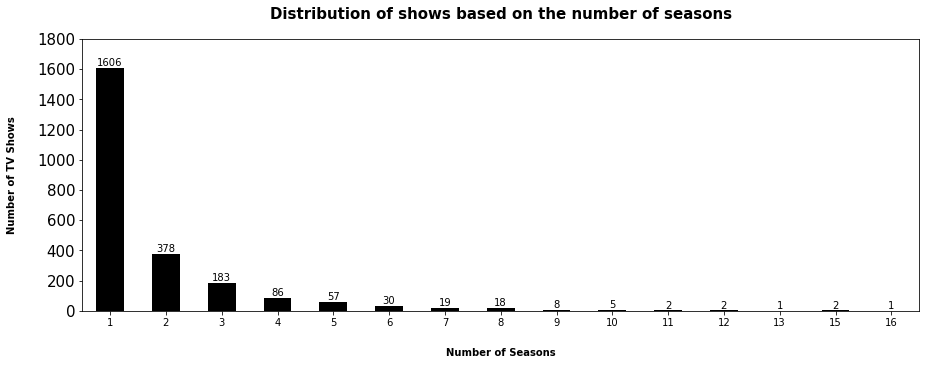

In [45]:
data = df.loc[~df.show_seasons.isin(['N/A'])]

ax = data.show_seasons.astype(int).sort_values().value_counts(sort=False).plot(kind='bar', color = 'k', figsize=(15,5))
plt.xlabel('Number of Seasons', fontweight='bold', labelpad=20)
plt.xticks(rotation=0)
plt.ylabel('Number of TV Shows', fontweight='bold', labelpad=20)
plt.title('Distribution of shows based on the number of seasons', fontweight='bold', fontsize=15, pad=20)
plt.yticks(np.arange(0,1801,200), fontsize=15)

for container in ax.containers:
    ax.bar_label(container)
    
plt.show()    

In [34]:
m = df.loc[(df.type == 'Movie')&(df.target_ages)].count()
s = df[df['type'] == 'TV Show'].groupby('target_ages').count()


In [35]:
movie = df.loc[(df.type == 'Movie')]['target_ages'].value_counts()
tv_show = df.loc[(df.type == 'TV Show')]['target_ages'].value_counts()
label = ['Adults', 'Teens', 'Older Kids', 'Kids']
color = ['red', 'k', 'k', 'k']
e = [0.1,0.1,0.1,0.1]

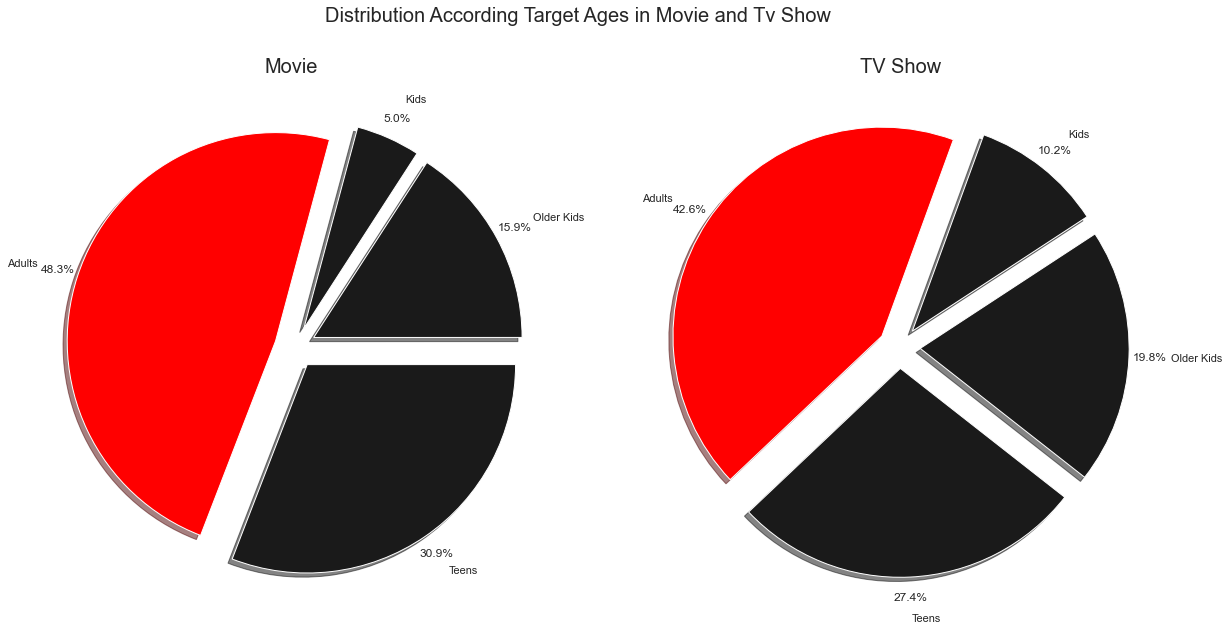

In [36]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

fig.suptitle('Distribution According Target Ages in Movie and Tv Show', fontsize=20)


ax1.pie(movie, labels=label, colors=color, autopct='%1.1f%%', startangle=75, explode=e, pctdistance=1.1, labeldistance=1.2, shadow=True)
ax1.axis('equal')
ax1.set_title('Movie', fontsize=20)
ax1.label_outer()


ax2.pie(tv_show, labels=label, colors=color, autopct='%1.1f%%', startangle=70, pctdistance=1.1, explode=e, labeldistance=1.2, shadow=True)
ax2.axis('equal')
ax2.set_title('TV Show', fontsize=20)
ax2.label_outer()

plt.rcParams['font.size'] = 15

plt.show()